In [1]:
import os
import json
import re
import math
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from skimage.io import imread, imsave
from skimage.transform import warp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter, find_peaks
import scipy.stats as stats
from scipy.integrate import odeint, solve_ivp
from numba import njit, prange
from skimage.filters import gaussian
from scipy.ndimage import uniform_filter1d
from numpy.polynomial import Polynomial
from sklearn.metrics import r2_score

In [36]:
def utility(A, sigma_A, sigma_N, r):
    return A*sigma_N**2 / sigma_A**2 - r * sigma_N

def sigma_0(sigma_A, A, r):
    return (sigma_A**2 / A)*r

In [73]:
A_H = 2.38e5
A_L = 5.6e6
sigma_A_H = 1.19e5
sigma_A_L = 2.52e5
sigma_N = np.arange(0,6e5,100)
r = 1

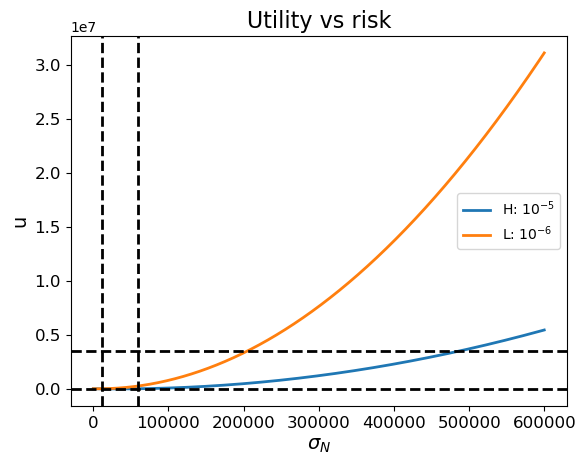

In [74]:
plt.plot(sigma_N,utility(A_H, sigma_A_H,sigma_N,r),label='H: $10^{-5}$', linewidth=2)
plt.plot(sigma_N,utility(A_L, sigma_A_L,sigma_N,r),label='L: $10^{-6}$', linewidth=2)
sigma_0_H = sigma_0(sigma_A_H, A_H, r)
sigma_0_L = sigma_0(sigma_A_L, A_L, r)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.axhline(y=3.5e6, color='black', linestyle='--', linewidth=2)
plt.axvline(x=sigma_0_H, color='black', linestyle='--', linewidth=2)
plt.axvline(x=sigma_0_L, color='black', linestyle='--', linewidth=2)
plt.xlabel('$\sigma_N$', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('u', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Utility vs risk', fontsize=16)
plt.legend(fontsize=10)
plt.savefig('utility_vs_risk.png',dpi=300)
plt.show()